In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Exploring a little before diving in

In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'
response = requests.get(endpoint)
response

<Response [200]>

In [3]:
result = response.json()
result

[{'month_name': 'January',
  'year': '2014',
  'query_count': '223',
  'query_text': 'ebid'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '112',
  'query_text': 'property maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '90',
  'query_text': 'property tax'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '76',
  'query_text': 'jobs'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '75',
  'query_text': 'employment'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '73',
  'query_text': 'human resources'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '62',
  'query_text': 'police'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '61',
  'query_text': 'criminal court clerk'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '53',
  'query_text': 'media releases'},
 {'mon

In [4]:
for entry in result:
    if (entry['query_text'] == 'fire'): #and (entry['year'] == 2016):
        print(entry)

{'month_name': 'February', 'year': '2014', 'query_count': '8', 'query_text': 'fire'}


## 1. Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?

In [5]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'
params = {
    'year':'2016',
    'query_text':'fire'
}
response = requests.get(endpoint, params)
response

<Response [200]>

In [6]:
response.text

'[{"month_name":"January","year":"2016","query_count":"19","query_text":"fire"}\n,{"month_name":"February","year":"2016","query_count":"35","query_text":"fire"}\n,{"month_name":"March","year":"2016","query_count":"32","query_text":"fire"}\n,{"month_name":"April","year":"2016","query_count":"26","query_text":"fire"}\n,{"month_name":"May","year":"2016","query_count":"24","query_text":"fire"}\n,{"month_name":"June","year":"2016","query_count":"31","query_text":"fire"}\n,{"month_name":"July","year":"2016","query_count":"24","query_text":"fire"}\n,{"month_name":"August","year":"2016","query_count":"47","query_text":"fire"}\n,{"month_name":"September","year":"2016","query_count":"36","query_text":"fire"}\n,{"month_name":"October","year":"2016","query_count":"38","query_text":"fire"}\n,{"month_name":"November","year":"2016","query_count":"32","query_text":"fire"}\n,{"month_name":"December","year":"2016","query_count":"38","query_text":"fire"}]\n'

In [7]:
text = response.json()
text

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

### Now to see which month had the most searches

In [8]:
months = []
searches = []

for entry in text:
    months.append(entry['month_name'])
    searches.append(int(entry['query_count']))
#end

In [9]:
months

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [10]:
searches

[19, 35, 32, 26, 24, 31, 24, 47, 36, 38, 32, 38]

In [11]:
fire_df = pd.DataFrame(months)
fire_df.columns = ['Month']
fire_df['Fire_Searches'] = searches
fire_df

,Month,Fire_Searches
0,January,19
1,February,35
2,March,32
3,April,26
4,May,24
5,June,31
6,July,24
7,August,47
8,September,36
9,October,38


<Axes: xlabel='Fire_Searches', ylabel='Month'>

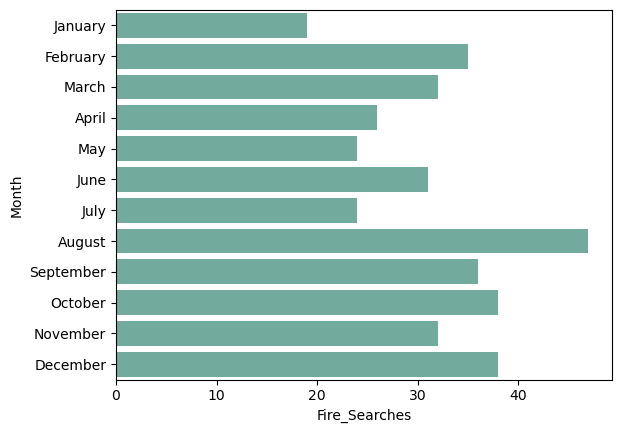

In [12]:
sns.barplot(
    x="Fire_Searches", 
    y="Month", 
    data=fire_df,
    color='#69b3a2')
# Had help from https://python-graph-gallery.com/basic-barplot-with-seaborn/

### Looks like August had the most searches for 'fire'

## 2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?

In [13]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count > 100&$limit=50000'
response = requests.get(endpoint)
response

<Response [200]>

In [14]:
results = response.json()
results

[{'month_name': 'March',
  'year': '2014',
  'query_count': '101',
  'query_text': 'permits'},
 {'month_name': 'January',
  'year': '2015',
  'query_count': '101',
  'query_text': 'criminal court clerk'},
 {'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '101',
  'query_text': 'police'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '101',
  'query_text': 'civil service'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '101',
  'query_text': 'jobs'},
 {'month_name': 'November',
  'year': '2017',
  'query_count': '101',
  'query_text': 'metro holidays'},
 {'month_name': 'November',
  'year': '2017',
  'query_count': '101',
  'query_text': 'longevity pay'},
 {'month_name': 'January',
  'year': '2018',
  'query_count': '101',
  'query_text': 'West Nashville Heights Church of Christ'},
 {'month_name': 'January',
  'year': '2018',
  'query_count': '101',
 

In [15]:
len(results)

1262

### There are 1262 queries that were searched over 100 times in a month

## 3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?

In [16]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count > 100&$limit=50000&query_text=''codes'''
response = requests.get(endpoint)
response

<Response [200]>

In [17]:
results = response.json()
results

[{'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'},
 {'month_name': 'April',
  'month': '4',
  'year': '2021',
  'query_count': '102',
  'query_text': 'codes'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '104',
  'query_text': 'codes'},
 {'month_name': 'November',
  'month': '11',
  'year': '2020',
  'query_count': '104',
  'query_text': 'codes'},
 {'month_name': 'December',
  'year': '2017',
  'query_count': '106',
  'query_text': 'codes'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '107',
  'query_text': 'codes'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '111',
  'query_text': 'codes'},
 {'month_name': 'July',
  'month': '7',
  'year': '2021',
  'query_count': '114',
  'query_text': 'codes'},
 {'month_name': 'January',
  'year': '2017',
  'query_count': '115',
  'query_text': 'codes'},
 {'month_name': 'May',
  'month': '5',
  'year': '2021',
  'query_count': '115',
  'query_text': 'codes'

In [18]:
len(results)

56

### 'codes' was looked up over a 100 times in 56 different months

## 4. Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [19]:
endpoint = ('https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=50000')
response = requests.get(endpoint)
response

<Response [200]>

In [20]:
results = response.json()
results

[{'month_name': 'January',
  'year': '2014',
  'query_count': '223',
  'query_text': 'ebid'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '112',
  'query_text': 'property maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '90',
  'query_text': 'property tax'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '76',
  'query_text': 'jobs'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '75',
  'query_text': 'employment'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '73',
  'query_text': 'human resources'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '62',
  'query_text': 'police'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '61',
  'query_text': 'criminal court clerk'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '53',
  'query_text': 'media releases'},
 {'mon

In [21]:
len(results)

43677

In [22]:
x = []
y = []

for result in results:
    if result['query_text'] == 'maps':
        x.append(result['month_name'][:2]+' '+result['year'][2:])
        y.append(int(result['query_count']))
#end

In [23]:
x

['Ja 14',
 'Fe 14',
 'Ma 14',
 'Ap 14',
 'Ma 14',
 'Ju 14',
 'Ju 14',
 'Au 14',
 'Se 14',
 'Oc 14',
 'No 14',
 'De 14',
 'Ja 15',
 'Fe 15',
 'Ap 15',
 'Ma 15',
 'Ja 17',
 'Ju 15',
 'Ju 15',
 'Au 15',
 'Se 15',
 'Oc 15',
 'No 15',
 'De 15',
 'Ja 16',
 'Fe 16',
 'Ma 16',
 'Ap 16',
 'Ma 16',
 'Ju 16',
 'Ju 16',
 'Au 16',
 'Se 16',
 'Oc 16',
 'No 16',
 'De 16',
 'Fe 17',
 'Ma 17',
 'Ap 17',
 'Ma 17',
 'Ju 17',
 'Ju 17',
 'Au 17',
 'Se 17',
 'Oc 17',
 'No 17',
 'De 17',
 'Ja 18',
 'Ma 18',
 'Ap 18',
 'Ma 18',
 'Ju 18',
 'Ju 18',
 'Au 18',
 'Se 18',
 'Oc 18',
 'No 18',
 'Ja 19',
 'Fe 19',
 'Ma 19',
 'Ap 19',
 'Ma 19',
 'Ju 19',
 'Ju 19',
 'Au 19',
 'Se 19',
 'Oc 19',
 'No 19',
 'Ja 20',
 'Ma 20',
 'Fe 20',
 'Ma 20',
 'Ap 20',
 'Ju 20',
 'Ju 20',
 'Au 20',
 'Oc 20',
 'No 20',
 'De 20',
 'Ma 21',
 'Ap 21',
 'Ju 21']

In [24]:
y

[97,
 140,
 144,
 152,
 119,
 121,
 121,
 118,
 115,
 100,
 82,
 97,
 119,
 129,
 130,
 109,
 117,
 120,
 148,
 81,
 110,
 110,
 102,
 117,
 104,
 130,
 83,
 115,
 125,
 125,
 149,
 137,
 181,
 138,
 120,
 108,
 235,
 331,
 351,
 266,
 265,
 236,
 238,
 222,
 224,
 155,
 121,
 173,
 188,
 189,
 156,
 154,
 173,
 186,
 240,
 166,
 164,
 160,
 98,
 88,
 110,
 105,
 116,
 124,
 106,
 83,
 116,
 96,
 154,
 124,
 100,
 139,
 114,
 139,
 136,
 125,
 127,
 86,
 113,
 132,
 148,
 151]

In [25]:
print(len(x),len(y))

82 82


In [26]:
maps_df = pd.DataFrame({'Date':x, 'Search_Count':y})
maps_df

,Date,Search_Count
0,Ja 14,97
1,Fe 14,140
2,Ma 14,144
3,Ap 14,152
4,Ma 14,119
...,...,...
77,No 20,86
78,De 20,113
79,Ma 21,132
80,Ap 21,148


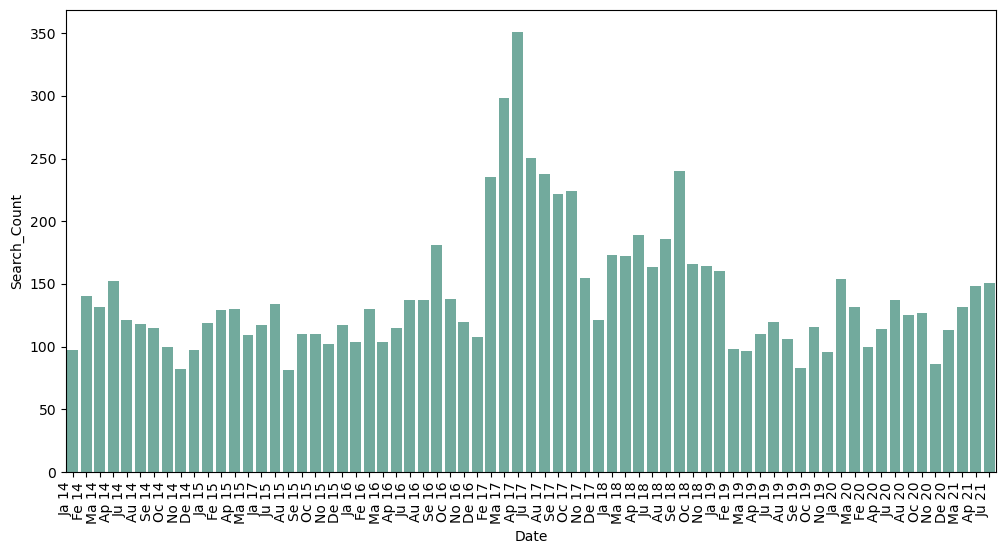

In [31]:
plt.figure(figsize=(12, 6))
graph = sns.barplot(
    x = 'Date',
    y = 'Search_Count',
    data = maps_df,
    color='#69b3a2',
    errorbar = None)
var = graph.set_xticklabels(graph.get_xticklabels(), rotation=90, horizontalalignment='right')
# With help from https://stackoverflow.com/questions/61368851/how-to-rotate-seaborn-barplot-x-axis-tick-labels
# and https://stackoverflow.com/questions/57165540/hide-text-before-seaborn-barplot